In [1]:
import pandas as pd

df_train = pd.read_csv('TrainN2.csv')
df_train.head()

,DateOfDeparture,Departure,CityDeparture,LongitudeDeparture,LatitudeDeparture,Arrival,CityArrival,LongitudeArrival,LatitudeArrival,WeeksToDeparture,std_wtdDistance,Norm Distance,Airports,IsHolidays,PAX
0,0.928767,ORD,Chicago,0.747393,0.671019,EWR,Newark,0.688004,0.938417,0.296656,0.255948,0.246995,2,0,7
1,0.164384,ATL,Atlanta,0.362189,0.738700,LGA,New York,0.691918,0.944181,0.403766,0.572291,0.184571,1,0,7
2,0.101093,ORD,Chicago,0.747393,0.671019,BOS,Boston,0.765205,1.000000,0.343116,0.363201,0.310356,2,0,7
3,0.942623,ORD,Chicago,0.747393,0.671019,SFO,San Francisco,0.546078,0.000000,0.312905,0.382722,0.662220,2,0,7
4,0.284153,SFO,San Francisco,0.546078,0.000000,JFK,New York,0.685569,0.946004,0.591042,0.561839,0.944995,2,0,7


In [3]:
df_test = pd.read_csv('TestV.csv')
df_test.head()

,DateOfDeparture,Departure,CityDeparture,LongitudeDeparture,LatitudeDeparture,Arrival,CityArrival,LongitudeArrival,LatitudeArrival,WeeksToDeparture,...,mean(StandardScale),std(StandardScale),CV(StandardScale),Distance(StandardScale),Airports,Date(Norm),Day,Month,Year,IsHolidays
0,2012-10-21,DFW,Dallas-Fort Worth,32.896828,-97.037997,SFO,San Francisco,37.618972,-122.374889,14.600000,...,1.091168,1.337355,0.345658,0.590574,2,0.806011,21,10,2012,0
1,2012-09-13,LAX,Los Angeles,33.942536,-118.408075,ATL,Atlanta,33.636719,-84.428067,14.730769,...,1.137155,2.161748,1.508792,1.215239,2,0.702186,13,9,2012,0
2,2012-09-04,ORD,Chicago,41.978603,-87.904842,IAH,Houston,29.984433,-95.341442,8.470588,...,-1.064346,-1.285581,-0.651422,-0.712174,2,0.677596,4,9,2012,1
3,2012-08-13,DEN,Denver,39.861656,-104.673178,PHX,Phoenix,33.434278,-112.011583,8.200000,...,-1.159503,-1.097835,0.086894,-0.697832,2,0.617486,13,8,2012,0
4,2012-09-10,ORD,Chicago,41.978603,-87.904842,SEA,Seattle,47.449000,-122.309306,12.090909,...,0.208802,0.213940,-0.030993,1.245372,2,0.693989,10,9,2012,0


In [3]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(df_train['Departure'])
df_train['Departure'] = le.transform(df_train['Departure'])
df_train['Arrival'] = le.transform(df_train['Arrival'])
df_test['Departure'] = le.transform(df_test['Departure'])
df_test['Arrival'] = le.transform(df_test['Arrival'])
le.fit(df_train['CityDeparture'])
df_train['CityDeparture'] = le.transform(df_train['CityDeparture'])
df_train['CityArrival'] = le.transform(df_train['CityArrival'])
df_test['CityDeparture'] = le.transform(df_test['CityDeparture'])
df_test['CityArrival'] = le.transform(df_test['CityArrival'])
le = LabelEncoder()
le.fit(df_train['DateOfDeparture'])
df_train['DateOfDeparture'] = le.transform(df_train['DateOfDeparture'])
df_test['DateOfDeparture'] = le.transform(df_test['DateOfDeparture'])
df_train.shape

(8899, 36)

In [4]:
'''
from sklearn.preprocessing import OneHotEncoder
cf = [0,1,2]
enc = OneHotEncoder(categorical_features=cf,sparse=False)
enc.fit(df_train)
#enc.fit(df_test)
X_train = enc.transform(df_train)
X_test = enc.transform(df_test)
X_train.shape
'''

'\nfrom sklearn.preprocessing import OneHotEncoder\ncf = [0,1,2]\nenc = OneHotEncoder(categorical_features=cf,sparse=False)\nenc.fit(df_train)\n#enc.fit(df_test)\nX_train = enc.transform(df_train)\nX_test = enc.transform(df_test)\nX_train.shape\n'

In [4]:
y_train = df_train[['PAX']]
X=df_train.values.T.tolist()
Y=y_train.values.T.tolist()

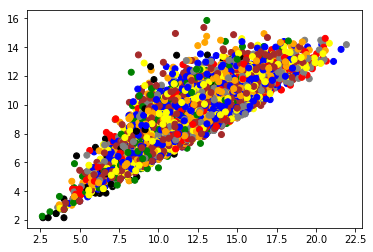

In [6]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
from matplotlib.colors import ListedColormap        
cmap_bold = ListedColormap(['blue', 'red', 'green', 'yellow','black','orange','brown','gray'])
plt.scatter(X[:][9], X[:][10], c=Y[0][:],cmap=cmap_bold)

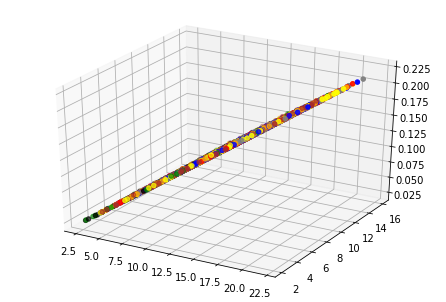

In [7]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = Axes3D(fig)

ax.scatter(X[:][9], X[:][10],X[:][11], c=Y[0][:],cmap=cmap_bold)

In [20]:
print(df_train['Distance'][0])
#print(t1[0])
#print(t2[0])
df_train[['DateOfDeparture', 'Departure','CityDeparture','LongitudeDeparture','LatitudeDeparture','Arrival','CityArrival','LongitudeArrival','LatitudeArrival','WeeksToDeparture','std_wtd','Distance','Norm Distance','Norm Distance(MAX)','mean(MinMaxScale)','std(MinMaxScale)','Distance(MinMaxScale)','mean(StandardScale)','std(StandardScale)','Distance(StandardScale)','Airports','Day','Month','Year','IsHolidays']].describe()
#df_train[['Distance', 'WeeksToDeparture','std_wtd','Norm mean','CV','CV of norm','Norm std','Norm Distance','Airports','IsHolidays']].describe()

1527.9398870021994


,DateOfDeparture,Departure,CityDeparture,LongitudeDeparture,LatitudeDeparture,Arrival,CityArrival,LongitudeArrival,LatitudeArrival,WeeksToDeparture,...,std(MinMaxScale),Distance(MinMaxScale),mean(StandardScale),std(StandardScale),Distance(StandardScale),Airports,Day,Month,Year,IsHolidays
count,8899.000000,8899.000000,8899.000000,8899.000000,8899.000000,8899.000000,8899.000000,8899.000000,8899.000000,8899.000000,...,8899.000000,8899.000000,8.899000e+03,8.899000e+03,8.899000e+03,8899.000000,8899.000000,8899.000000,8899.000000,8899.000000
mean,273.776267,8.976065,7.829419,37.808886,-93.742886,8.998427,7.748961,37.736862,-93.677790,11.459248,...,0.471840,0.312712,-2.827644e-16,4.751602e-16,3.757950e-17,1.894595,15.588718,6.853130,2011.887965,0.324643
std,160.450768,6.149208,5.614128,4.665040,17.447421,6.191591,5.664827,4.704364,17.498414,2.797870,...,0.156162,0.274679,1.000056e+00,1.000056e+00,1.000056e+00,0.307092,8.893761,3.819174,0.575332,0.665354
min,0.000000,0.000000,0.000000,25.793250,-122.374889,0.000000,0.000000,25.793250,-122.374889,2.625000,...,0.000000,0.000000,-3.157668e+00,-3.021639e+00,-1.138528e+00,1.000000,1.000000,1.000000,2011.000000,0.000000
25%,133.000000,3.000000,3.000000,33.636719,-112.011583,3.000000,3.000000,33.636719,-112.011583,9.500000,...,0.359750,0.115814,-7.003035e-01,-7.178174e-01,-7.168710e-01,2.000000,8.000000,3.000000,2012.000000,0.000000
50%,273.000000,9.000000,8.000000,39.861656,-87.904842,10.000000,8.000000,39.861656,-87.904842,11.285714,...,0.468097,0.224416,-6.202712e-02,-2.396826e-02,-3.214716e-01,2.000000,16.000000,8.000000,2012.000000,0.000000
75%,414.500000,15.000000,12.000000,41.978603,-80.290556,15.000000,12.000000,41.978603,-80.290556,13.260870,...,0.583432,0.434935,6.439621e-01,7.146291e-01,4.449900e-01,2.000000,23.000000,10.000000,2012.000000,0.000000
max,551.000000,19.000000,18.000000,47.449000,-71.005181,19.000000,18.000000,47.449000,-71.005181,21.933333,...,1.000000,1.000000,3.743802e+00,3.382313e+00,2.502287e+00,2.000000,31.000000,12.000000,2013.000000,2.000000


Text(0, 0.5, 'Frequency')

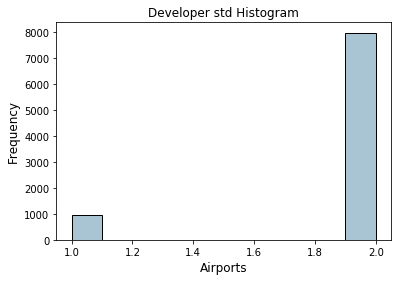

In [24]:
%matplotlib inline
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
df_train['Airports'].hist(color='#A9C5D3', edgecolor='black',  
                          grid=False)
ax.set_title('Developer std Histogram', fontsize=12)
ax.set_xlabel('Airports', fontsize=12)
ax.set_ylabel('Frequency', fontsize=12)

0.2966564269217033 0.2559483578144444 7


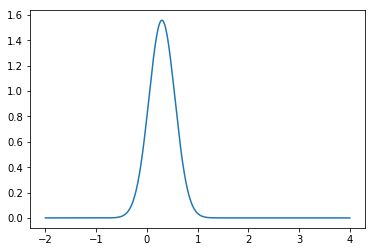

0.4037662131176587 0.5722905510221129 7


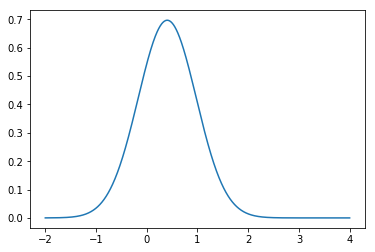

0.34311609840369983 0.3632013686483367 7


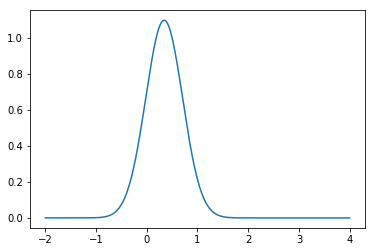

0.3129046180412825 0.3827219592930897 7


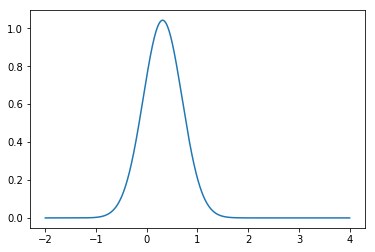

0.5910420562979561 0.5618387270308836 7


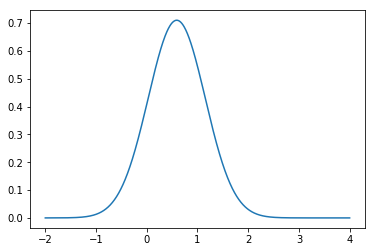

0.5711961754243786 0.5402098261886671 7


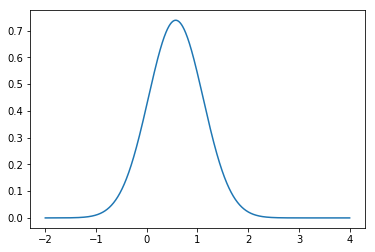

0.3574267996278938 0.3303267955396298 7


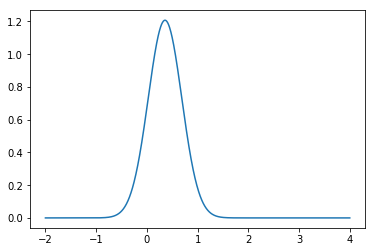

0.3586534311616033 0.41381096635532666 7


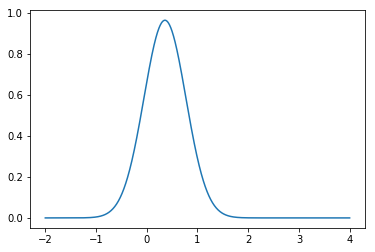

0.6840742339226311 0.6548287285821441 7


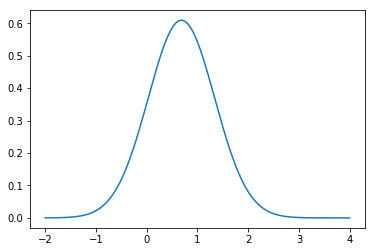

0.37650773459417614 0.4256376596945789 7


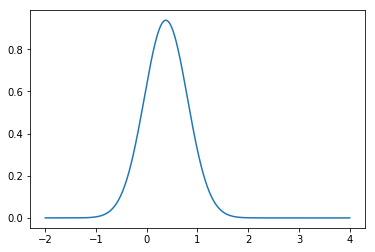

0.2576607682352312 0.2312746555724853 2


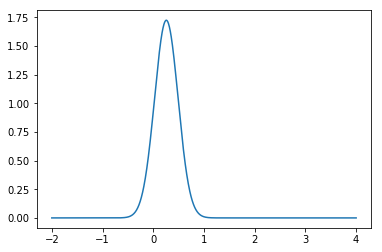

0.7764858209145905 0.8082246356766334 7


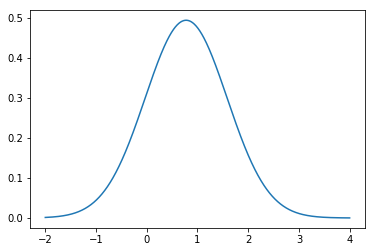

0.8834489510226735 0.7795921412573884 7


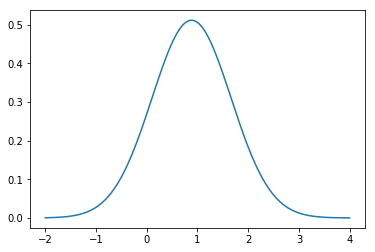

0.5532684837834326 0.4937308228807423 0


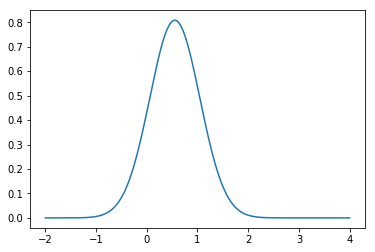

0.5443951818602407 0.7245603481165642 0


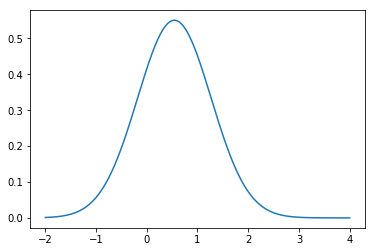

0.4875336144246656 0.4285582333360878 0


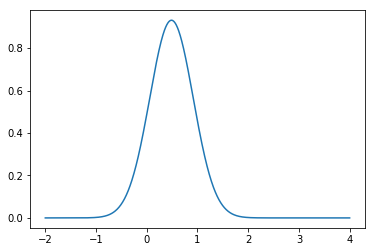

0.6594118009730849 0.660169277610313 0


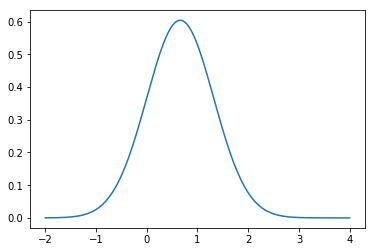

0.6141264715090446 0.5357045299882058 0


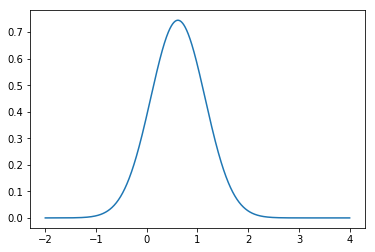

0.3215364695731059 0.2702823115698741 0


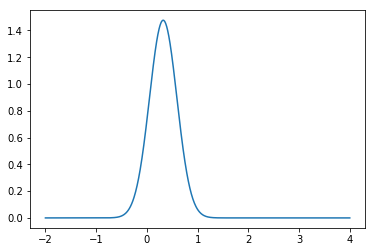

0.3410717125145293 0.2792723275104331 0


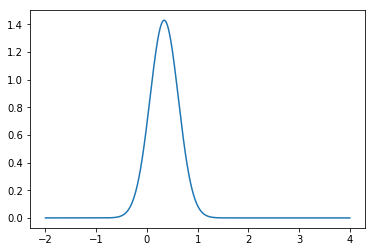

0.289280603321518 0.2648107952790494 7


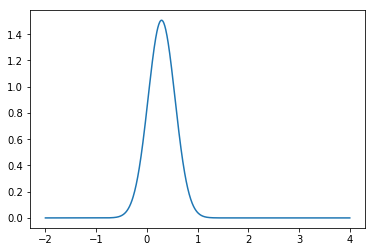

0.7879348991329962 0.7662880540409661 7


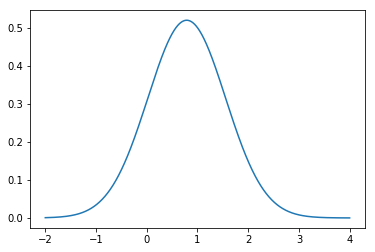

0.6034110696082926 0.638218643962998 0


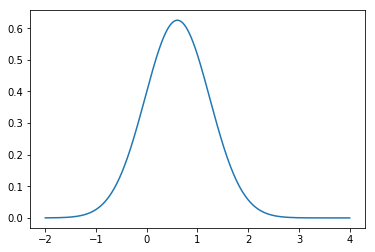

0.2714717306868735 0.2904252604086509 2


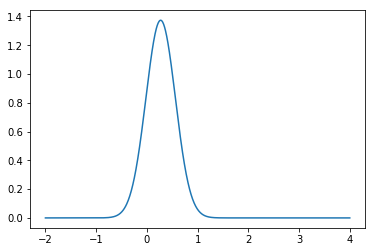

0.31798217776576265 0.3149878609439163 4


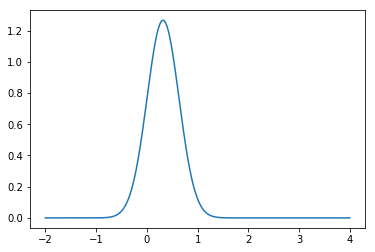

0.6020716443687564 0.8938056190772143 2


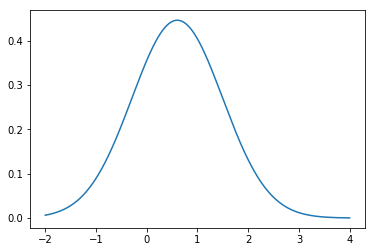

0.330168321105447 0.30459873604842913 2


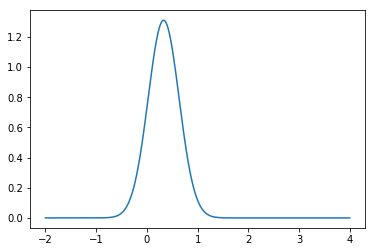

0.3868919168862959 0.3067417432002809 0


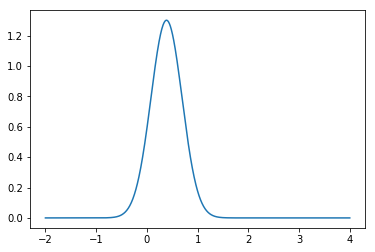

0.4737709420482931 0.4970266310791987 0


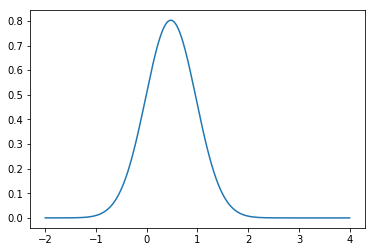

0.4625233779343333 0.7110225140990023 2


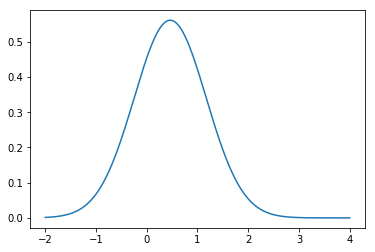

0.7084685969507268 0.8748012511885437 3


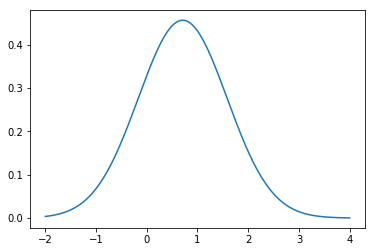

0.7758857456776451 0.6887333758372483 0


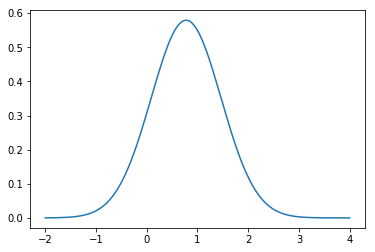

0.1903323262843165 0.260955581359036 2


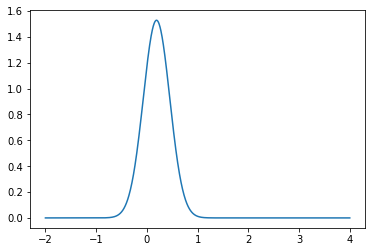

0.4282988437866696 0.5355197755753014 3


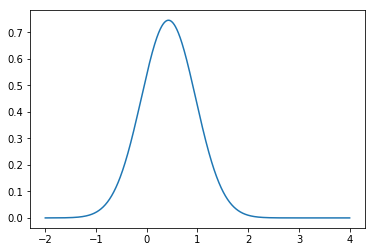

0.1907307194318356 0.16652250257614626 0


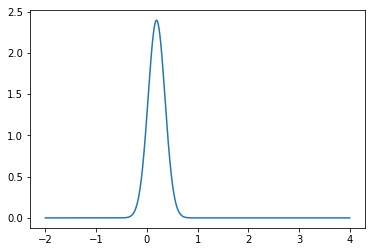

0.3531865918576662 0.3787777516248943 3


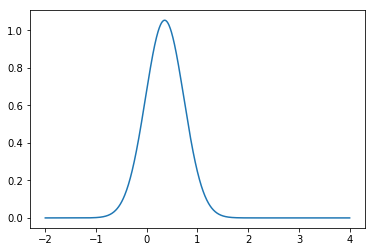

0.4772550712135991 0.482992322106177 7


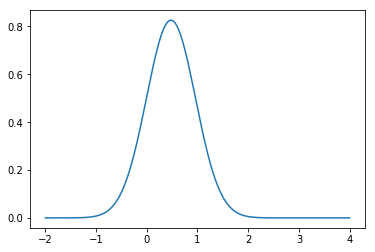

0.6236512732009042 0.6160365857501452 2


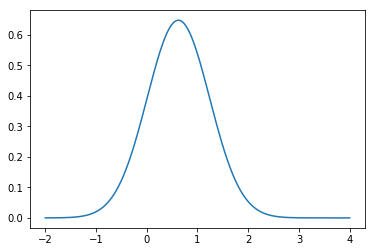

0.2611135088482712 0.238932832761153 3


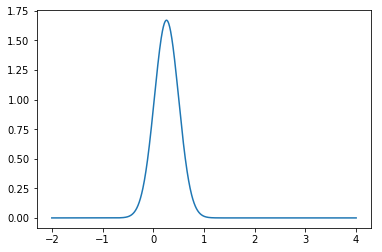

0.8326820562483086 0.7954446372938462 3


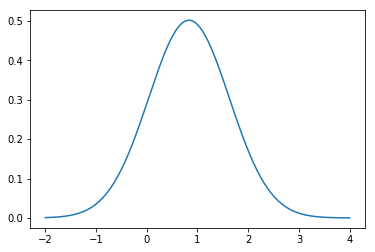

0.4720309245480743 0.6008631899632215 2


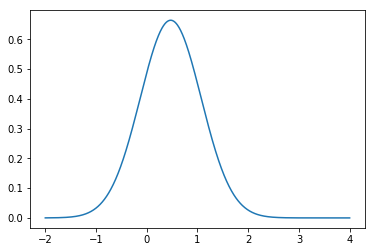

0.4473797787508804 0.5873478793729292 0


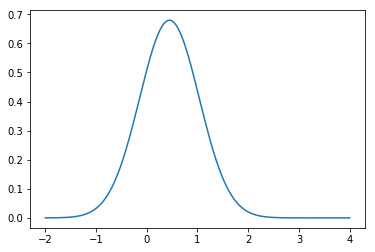

0.3379369874843987 0.3419944113137746 3


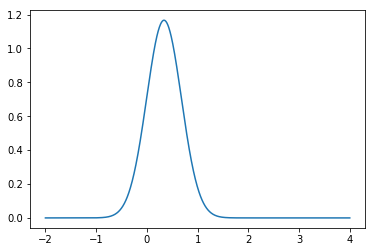

0.3845489857581089 0.33872958364031097 3


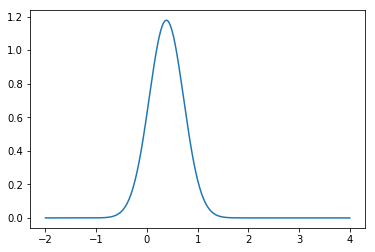

0.3733275787661171 0.4022283367848716 3


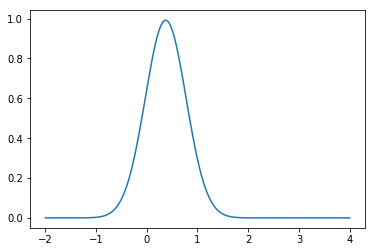

0.7256640640357804 0.7359661991242126 3


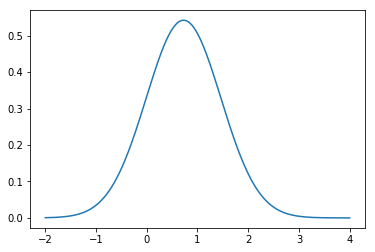

0.2524816573159301 0.1898052320041071 4


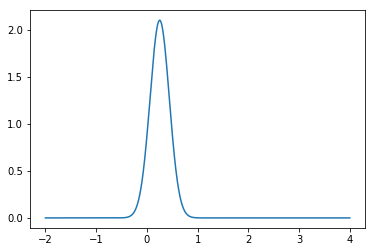

0.6171773845517777 0.8019045586480253 2


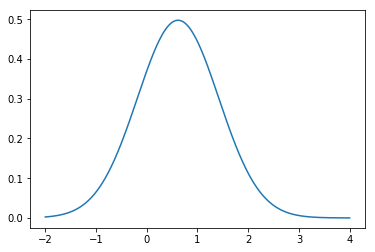

0.4362167827853885 0.4496630064371223 0


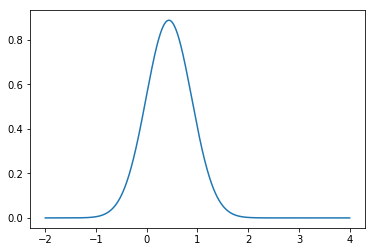

0.3445547403258431 0.33910253083036795 0


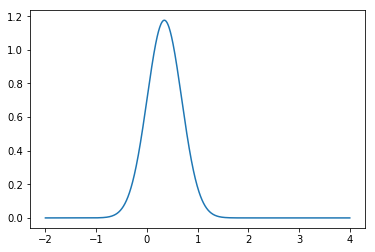

0.3949072075967112 0.3996045482272644 3


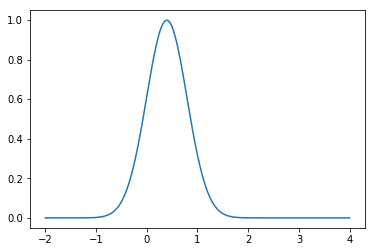

0.4182132067335662 0.4037269645089505 7


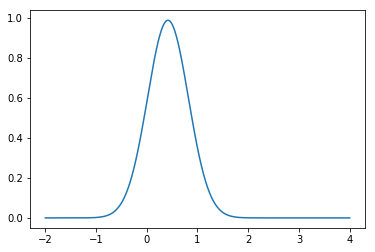

0.6224181515539446 0.6011095694306039 7


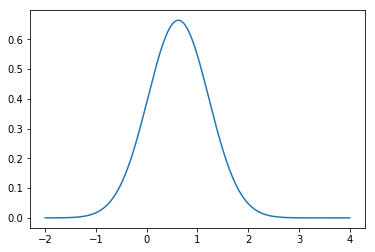

0.5047235409797234 0.4493016638311323 7


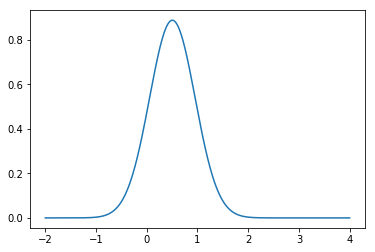

0.4661199827371017 0.3755352778629164 0


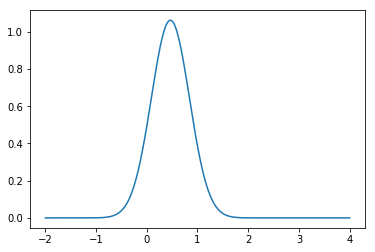

0.4182132067335662 0.4077077735425125 0


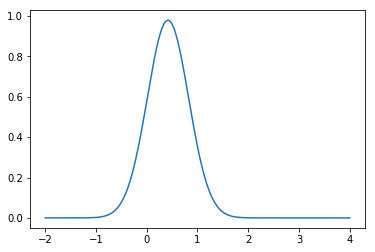

0.6236512732009042 0.6003900868532465 7


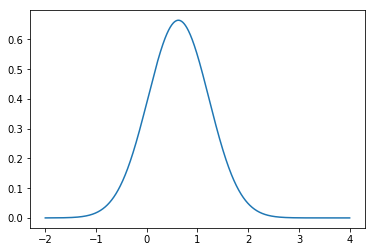

0.2936098910869117 0.2385376234653945 2


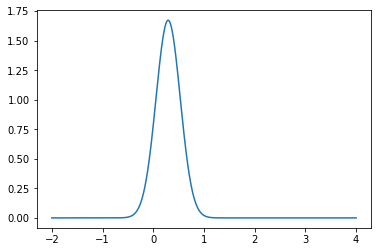

0.568407423393299 0.5614405242412487 5


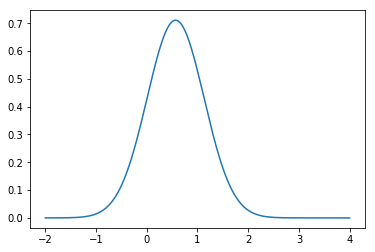

0.5217954251195889 0.6529981785655282 0


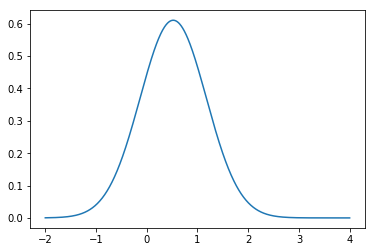

0.34844753611471463 0.4695954364380027 3


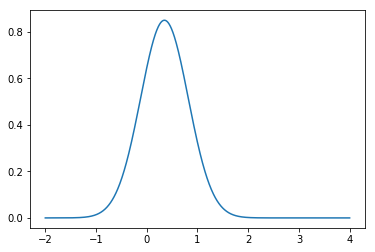

0.2947322990258002 0.28296377573544623 3


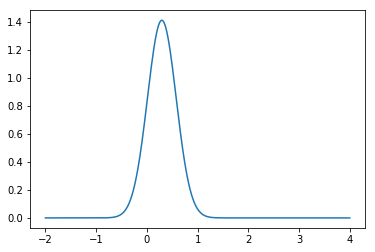

0.6552021788013038 0.5924451305930237 0


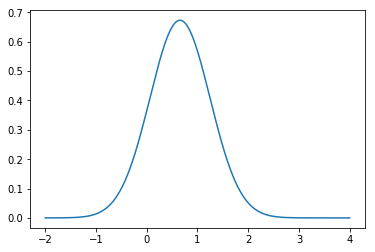

0.3704502949223487 0.4270322671307514 3


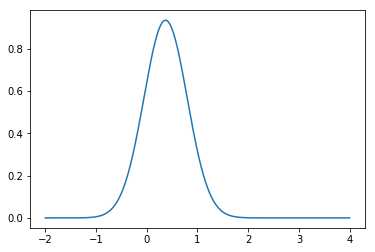

0.3244137534173922 0.2851353231009574 3


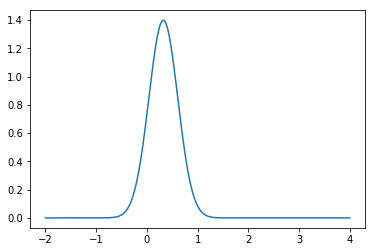

0.2479118535634837 0.2592493515516007 3


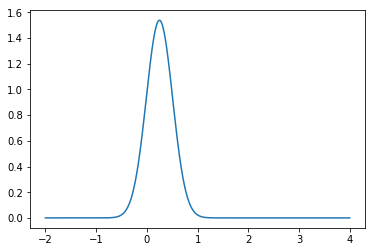

0.37650773459417614 0.35373387746775103 0


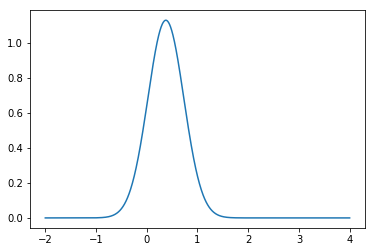

0.4831875073551717 0.5323168288501968 3


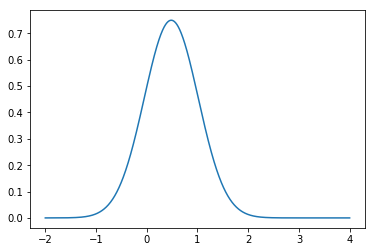

0.5724767248313725 0.4635404210524439 3


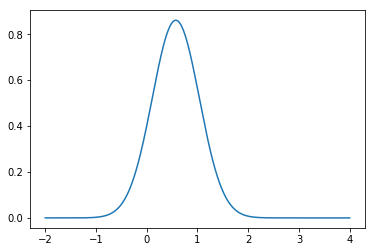

0.3332148569402387 0.3423288740061805 3


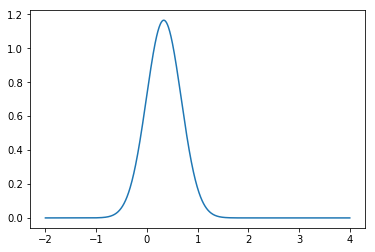

0.4251186879575747 0.3806592821381841 0


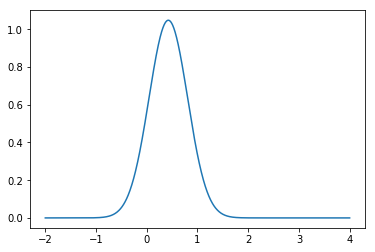

0.4991708879438917 0.7227915043631934 5


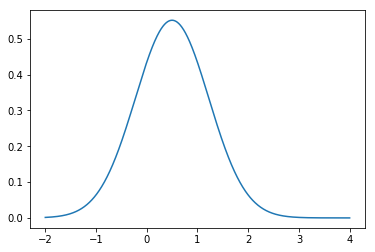

0.6678463530438807 0.77960554010549 5


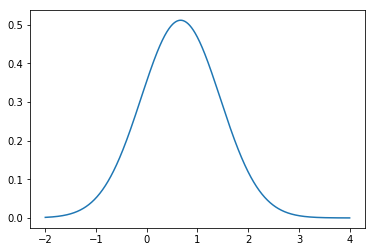

0.4720309245480743 0.5284640265266655 3


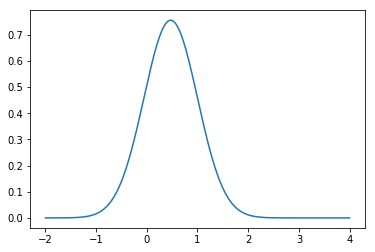

0.4104445403546146 0.4123374053557802 5


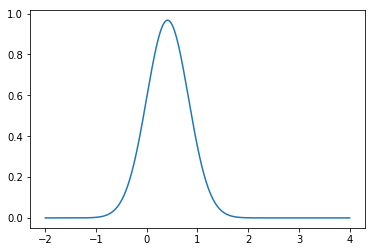

0.4648252050072764 0.696542475717019 5


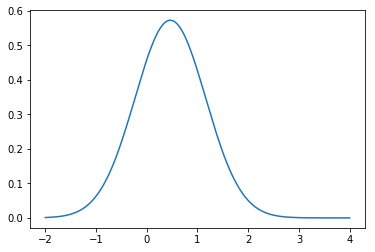

0.4104445403546146 0.6188652905865893 5


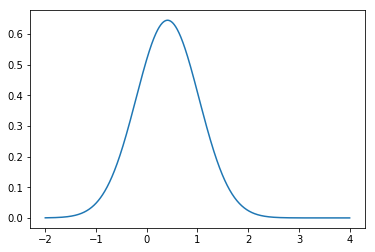

0.3934685656735322 0.5607200344232458 5


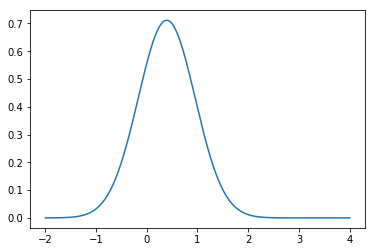

0.2265861027194244 0.16872677731049252 0


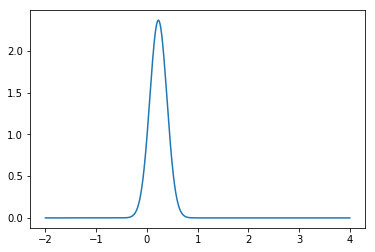

0.3027494985912864 0.28785903476668584 5


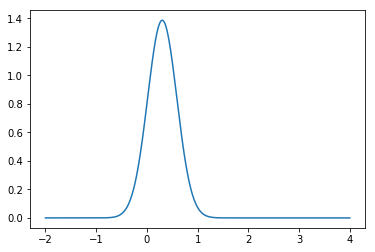

0.22288673777699247 0.1946426915456746 0


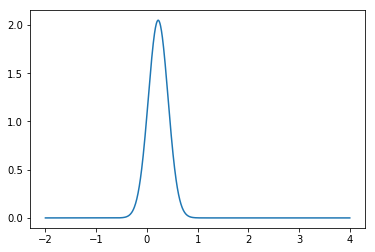

0.3022808007708283 0.40420499936417215 0


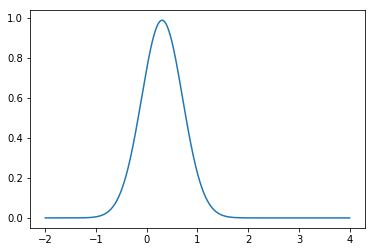

0.4878957900137901 0.5230646905573055 3


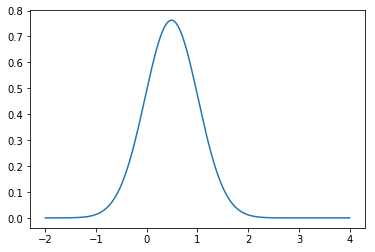

0.5808372895996218 0.5778210361112043 0


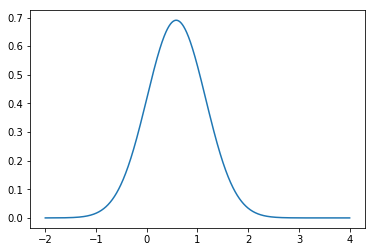

0.1986985823848057 0.1762760742009532 2


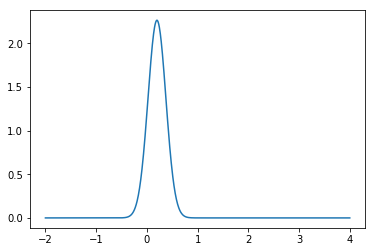

0.6083057593657459 0.5583184640425973 6


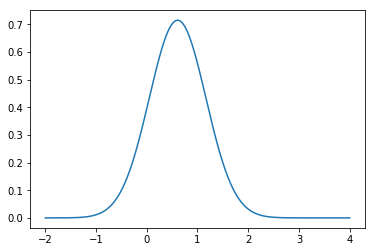

0.5013041601786816 0.5210909489136959 6


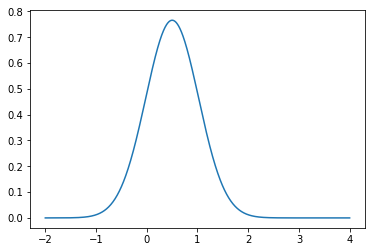

0.3638325420809044 0.2930267502891701 0


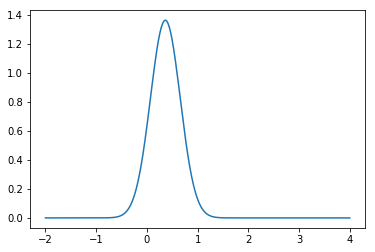

0.42557299593685904 0.536530094392961 6


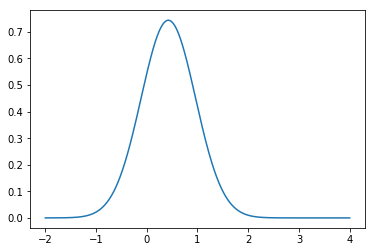

0.5157531290453444 0.4979157141969409 0


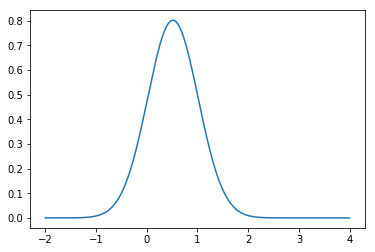

0.4607719877642828 0.6061598245069588 5


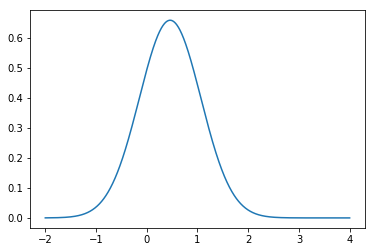

0.2557186016404933 0.1978556781592792 6


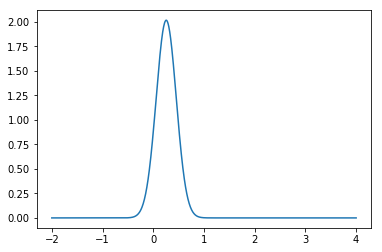

0.4682779456218703 0.6588821120703088 6


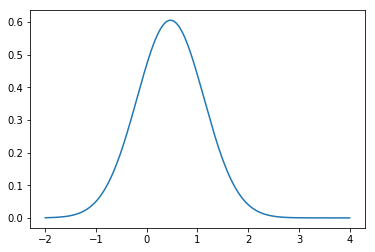

0.517911091930113 0.4882701775786836 2


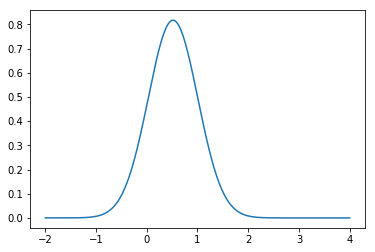

0.5931077985456938 0.6777679025770209 5


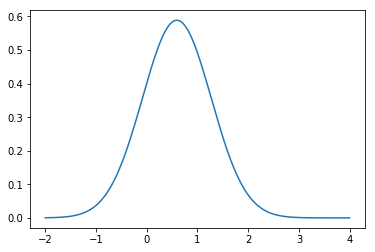

0.4446539309010698 0.6866726998859796 0


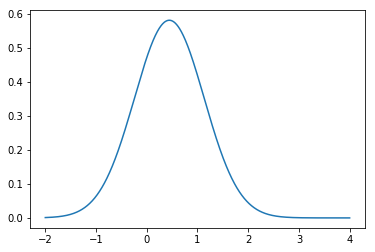

0.6829952524828365 0.6852235452102547 0


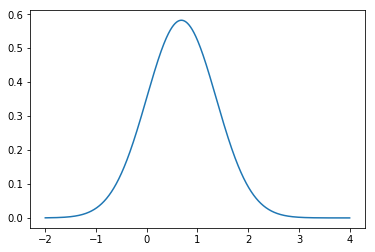

0.5249028916711695 0.4681318404756695 3


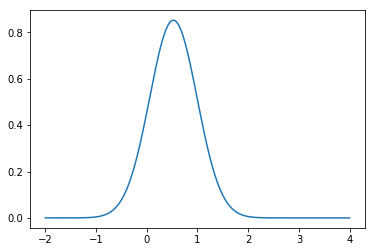

0.2783772119124357 0.2108825082378874 3


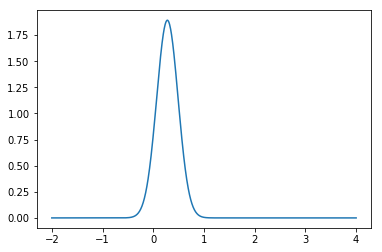

0.3789128944636667 0.5912845012400804 3


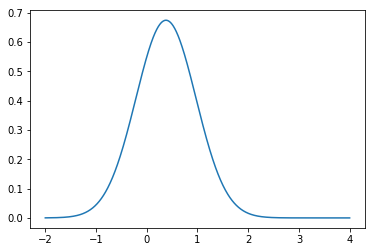

In [3]:
import pylab
import numpy as np
from scipy.stats import norm
for i in range(100):
    print(df_train['WeeksToDeparture'][i],df_train['std_wtdDistance'][i],df_train['PAX'][i])
    x = np.linspace(-2,4,1000)
    y = norm.pdf(x, loc=df_train['WeeksToDeparture'][i], scale=df_train['std_wtdDistance'][i])    # for example
#y=norm.pdf(x, loc=-1.110302258, scale=-1.382558153)
    pylab.plot(x,y)
    pylab.show()

In [5]:
df_train['PAX'].value_counts()

6    2153
0    1910
3    1606
5    1198
7     964
2     576
1     383
4     109
Name: PAX, dtype: int64

In [8]:
#y_train = df_train[['PAX']]

#from sklearn.model_selection import train_test_split
#df_train, df_test, y_train, y_test = train_test_split(df_train, y_train, test_size=0.2, random_state=42)

In [19]:
'''
p0 =0
p1 =0
p2 =0
p3=0
p4=0
p5=0
p6=0
p7=0
df=df_test['PAX'].tolist()
for i in range(len(df)):
    if(df[i]==0):
        p0=p0+1
    elif(df[i]==1):
        p1=p1+1
    elif(df[i]==2):
        p2=p2+1
    elif(df[i]==3):
        p3=p3+1
    elif(df[i]==4):
        p4=p4+1
    elif(df[i]==5):
        p5=p5+1
    elif(df[i]==6):
        p6=p6+1
    elif(df[i]==7):
        p7=p7+1
print('p0: ',(p0/len(df_test))*100,p0)
print('p1: ',(p1/len(df_test))*100,p1)
print('p2: ',(p2/len(df_test))*100,p2)
print('p3: ',(p3/len(df_test))*100,p3)
print('p4: ',(p4/len(df_test))*100,p4)
print('p5: ',(p5/len(df_test))*100,p5)
print('p6: ',(p6/len(df_test))*100,p6)
print('p7: ',(p7/len(df_test))*100,p7)        
all=p0+p1+p2+p3+p4+p5+p6+p7
all2=p0+p1+p2+p3+p4+p5+p6+p7
print('all: ',all)
print(len(df_test))
'''

0
p0:  21.235955056179776 378
p1:  4.269662921348314 76
p2:  5.955056179775281 106
p3:  18.820224719101123 335
p4:  1.2359550561797752 22
p5:  13.426966292134832 239
p6:  23.70786516853933 422
p7:  11.348314606741573 202
all:  1780
